In [1]:
from functools import cached_property
import math
from typing import Callable, ClassVar

import matplotlib.pyplot as plt
import numpy as np

from boundary_value_problems import solve_tridiagonal_matrix_system


def f(x):
    return 1 - x**2


class Solver:
    M_inf: float
    
    X_LEFT: ClassVar[float] = -1
    X_RIGHT: ClassVar[float] = 1
    Y_BOTTOM: ClassVar[float] = 0

    def __init__(
        self, 
        f: Callable[[float], float], 
        N_x: int = 1000, 
        N_y: int = 1000
    ):
        self.f = f
        
        self.N_x = N_x
        self.x = np.linspace(self.X_LEFT, self.X_RIGHT, self.N_x)

        self.N_y = N_y
        self.Y_TOP = None
        self.y = None

        self.psi = None
        
    @property
    def h_x(self) -> float:
        return (self.X_RIGHT - self.X_LEFT) / self.N_x

    @property
    def h_y(self) -> float:
        return (self.Y_TOP - self.Y_BOTTOM) / self.N_y

    @property
    def h(self) -> float:
        assert self.Y_TOP is not None, 'You must set h'
        return self.Y_TOP

    @h.setter
    def h(self, value: float) -> None:
        self.Y_TOP = value
        self.y = np.linspace(self.Y_BOTTOM, self.Y_TOP, self.N_y)

    def run(self) -> np.matrix:
        psi = np.zeros((len(self.x), len(self.y)))
        psi[:, 0] = -self.f(self.x)
        psi[:, -1] = 0

        h_x = self.h_x
        h_y = self.h_y

        A = C = np.ones((self.N_y - 3, ))
        B = -((self.M_inf**2 - 1) * (h_y / h_x)**2 + 2)
        B = B * np.ones((self.N_y - 2, ))
        for i in range(self.N_x):
            D = -(self.M_inf**2 - 1) * (h_y / h_x)**2
            if i == 0:
                D = D * np.zeros((self.N_y - 2,))
            elif i == 1:
                D = D * (2 * psi[i - 1, 1:-1])
            else:
                D = D * (2 * psi[i - 1, 1:-1] - psi[i - 2, 1:-1])
            D[0] = D[0] + self.f(self.x[i])

            psi[i, 1:-1] = solve_tridiagonal_matrix_system(
                A, B, C, D
            )
        return psi


In [2]:
solver = Solver(f, 1000, 1000)

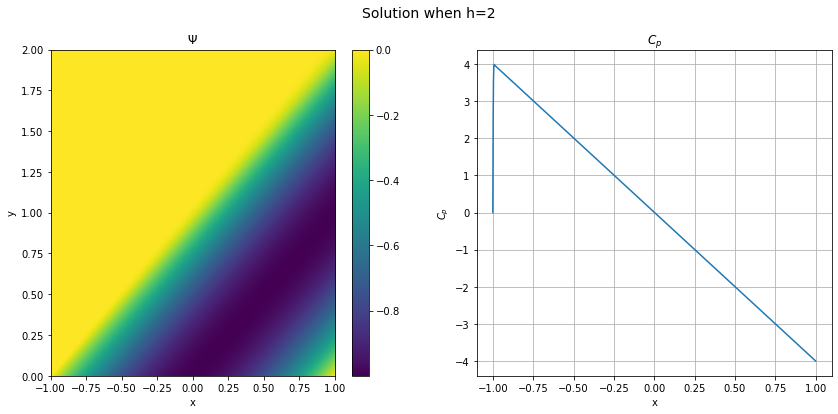

In [3]:
solver.h = 2
solver.M_inf = math.sqrt(2)
psi = solver.run()

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

psi_map = ax1.imshow(
    psi.transpose(), 
    origin='lower',
    aspect='auto',
    extent=(solver.X_LEFT, solver.X_RIGHT, 
            solver.Y_BOTTOM, solver.Y_TOP)
)
plt.colorbar(psi_map, ax=ax1)
ax1.set_title('$\Psi$')
ax1.set_xlabel('x')
ax1.set_ylabel('y')

c_p =  2 / (solver.M_inf**2 - 1) * (psi[:,1] - psi[:,0]) / (solver.h_y)
ax2.plot(solver.x, c_p)
ax2.set_title('$C_p$')
ax2.set_xlabel('x')
ax2.set_ylabel('$C_p$')
ax2.grid(True)

fig.suptitle(f'Solution when h={solver.h}', fontsize=14)

plt.show()

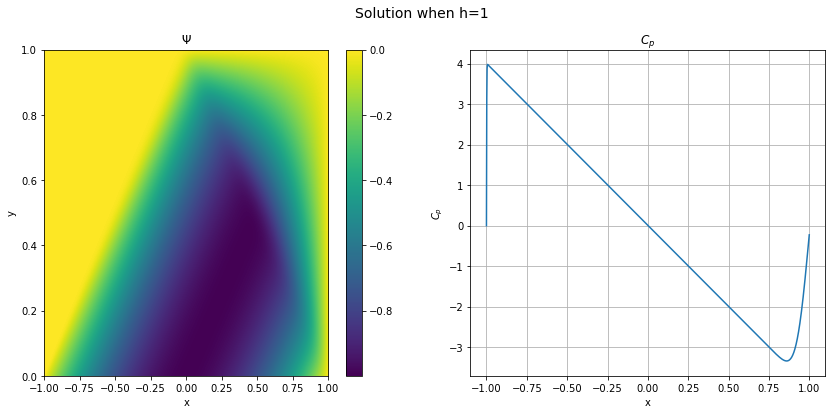

In [4]:
solver.h = 1
solver.M_inf = math.sqrt(2)
psi = solver.run()

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

psi_map = ax1.imshow(
    psi.transpose(), 
    origin='lower',
    aspect='auto',
    extent=(solver.X_LEFT, solver.X_RIGHT, 
            solver.Y_BOTTOM, solver.Y_TOP)
)
plt.colorbar(psi_map, ax=ax1)
ax1.set_title('$\Psi$')
ax1.set_xlabel('x')
ax1.set_ylabel('y')

c_p =  2 / (solver.M_inf**2 - 1) * (psi[:,1] - psi[:,0]) / (solver.h_y)
ax2.plot(solver.x, c_p)
ax2.set_title('$C_p$')
ax2.set_xlabel('x')
ax2.set_ylabel('$C_p$')
ax2.grid(True)

fig.suptitle(f'Solution when h={solver.h}', fontsize=14)

plt.show()

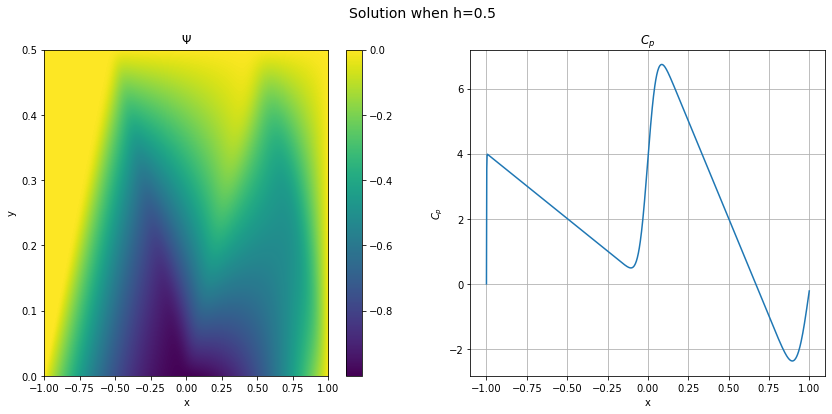

In [5]:
solver.h = 0.5
solver.M_inf = math.sqrt(2)
psi = solver.run()

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

psi_map = ax1.imshow(
    psi.transpose(), 
    origin='lower',
    aspect='auto',
    extent=(solver.X_LEFT, solver.X_RIGHT, 
            solver.Y_BOTTOM, solver.Y_TOP)
)
plt.colorbar(psi_map, ax=ax1)
ax1.set_title('$\Psi$')
ax1.set_xlabel('x')
ax1.set_ylabel('y')

c_p =  2 / (solver.M_inf**2 - 1) * (psi[:,1] - psi[:,0]) / (solver.h_y)
ax2.plot(solver.x, c_p)
ax2.set_title('$C_p$')
ax2.set_xlabel('x')
ax2.set_ylabel('$C_p$')
ax2.grid(True)

fig.suptitle(f'Solution when h={solver.h}', fontsize=14)

plt.show()

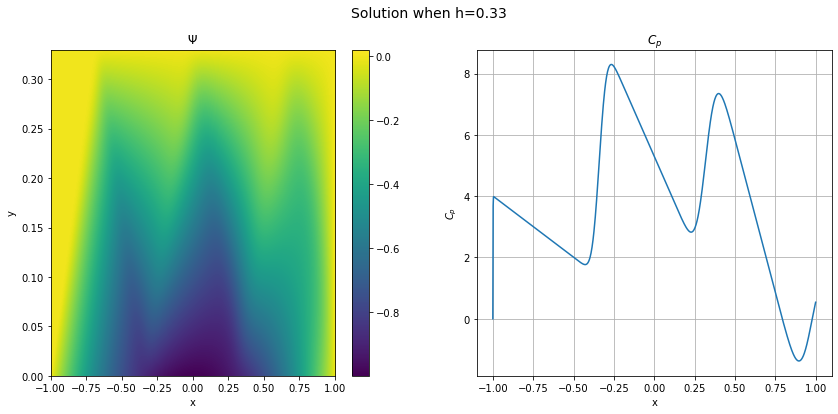

In [6]:
solver.h = 0.33
solver.M_inf = math.sqrt(2)
psi = solver.run()

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

psi_map = ax1.imshow(
    psi.transpose(), 
    origin='lower',
    aspect='auto',
    extent=(solver.X_LEFT, solver.X_RIGHT, 
            solver.Y_BOTTOM, solver.Y_TOP)
)
plt.colorbar(psi_map, ax=ax1)
ax1.set_title('$\Psi$')
ax1.set_xlabel('x')
ax1.set_ylabel('y')

c_p =  2 / (solver.M_inf**2 - 1) * (psi[:,1] - psi[:,0]) / (solver.h_y)
ax2.plot(solver.x, c_p)
ax2.set_title('$C_p$')
ax2.set_xlabel('x')
ax2.set_ylabel('$C_p$')
ax2.grid(True)

fig.suptitle(f'Solution when h={solver.h}', fontsize=14)

plt.show()

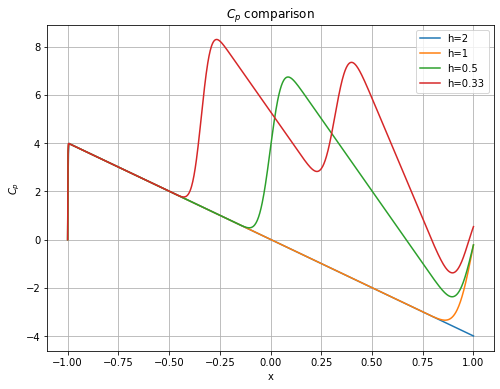

In [7]:
fig, ax = plt.subplots(figsize=(8, 6))

for h in (2, 1, 0.5, 0.33):
    solver.h = h
    psi = solver.run()
    c_p = 2 / (solver.M_inf**2 - 1) * (psi[:,1] - psi[:,0]) / (solver.h_y)
    ax.plot(solver.x, c_p, label=f'h={solver.h}')

ax.set_title('$C_p$ comparison')
ax.legend()
ax.grid(True)
ax.set_xlabel('x')
ax.set_ylabel('$C_p$')

plt.show()

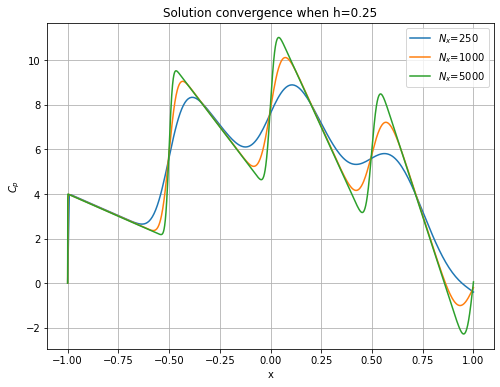

In [26]:
fig, ax = plt.subplots(figsize=(8, 6))

for N_x in (250, 1000, 5000):
    solver = Solver(f, N_x, 1000)
    solver.M_inf = math.sqrt(2)
    solver.h = 0.25
    psi = solver.run()
    c_p = 2 / (solver.M_inf**2 - 1) * (psi[:,1] - psi[:,0]) / (solver.h_y)
    ax.plot(solver.x, c_p, label=f'$N_x$={N_x}')

ax.set_title(f'Solution convergence when h={solver.h}')
ax.legend()
ax.grid(True)
ax.set_xlabel('x')
ax.set_ylabel('$C_p$')

plt.show()

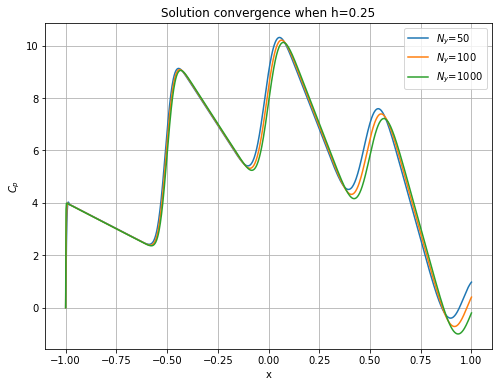

In [27]:
fig, ax = plt.subplots(figsize=(8, 6))

for N_y in (50, 100, 1000):
    solver = Solver(f, 1000, N_y)
    solver.M_inf = math.sqrt(2)
    solver.h = 0.25
    psi = solver.run()
    c_p = 2 / (solver.M_inf**2 - 1) * (psi[:,1] - psi[:,0]) / (solver.h_y)
    ax.plot(solver.x, c_p, label=f'$N_y$={N_y}')

ax.set_title(f'Solution convergence when h={solver.h}')
ax.legend()
ax.grid(True)
ax.set_xlabel('x')
ax.set_ylabel('$C_p$')

plt.show()